# Final Project

**Due December 7th, 2022 (Wednesday)**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
url <- 'https://raw.githubusercontent.com/simmiagarwal/BIOS512-assignments/main/2018-nc-precinct-general-house-fedandstate.csv'
df <- read_csv(url, col_type = cols())
head(df)

precinct,office,party_detailed,party_simplified,mode,votes,county_name,county_fips,jurisdiction_name,jurisdiction_fips,⋯,stage,state,special,writein,state_po,state_fips,state_cen,state_ic,date,readme_check
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,⋯,<chr>,<chr>,<lgl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
1,US HOUSE,DEMOCRAT,DEMOCRAT,ABSENTEE BY MAIL,4,WARREN,37185,WARREN,37185,⋯,GEN,NORTH CAROLINA,FALSE,FALSE,NC,37,56,47,11/6/2018,FALSE
1,US HOUSE,DEMOCRAT,DEMOCRAT,ELECTION DAY,145,WARREN,37185,WARREN,37185,⋯,GEN,NORTH CAROLINA,FALSE,FALSE,NC,37,56,47,11/6/2018,FALSE
1,US HOUSE,DEMOCRAT,DEMOCRAT,ONE STOP,100,WARREN,37185,WARREN,37185,⋯,GEN,NORTH CAROLINA,FALSE,FALSE,NC,37,56,47,11/6/2018,FALSE
1,US HOUSE,DEMOCRAT,DEMOCRAT,PROVISIONAL,1,WARREN,37185,WARREN,37185,⋯,GEN,NORTH CAROLINA,FALSE,FALSE,NC,37,56,47,11/6/2018,FALSE
1,US HOUSE,REPUBLICAN,REPUBLICAN,ABSENTEE BY MAIL,10,WARREN,37185,WARREN,37185,⋯,GEN,NORTH CAROLINA,FALSE,FALSE,NC,37,56,47,11/6/2018,FALSE
1,US HOUSE,REPUBLICAN,REPUBLICAN,ELECTION DAY,265,WARREN,37185,WARREN,37185,⋯,GEN,NORTH CAROLINA,FALSE,FALSE,NC,37,56,47,11/6/2018,FALSE


# Split Data Set Into US House and State House elections

In [7]:
us <- df |>
    filter(office == 'US HOUSE')
head(us)

precinct,office,party_detailed,party_simplified,mode,votes,county_name,county_fips,jurisdiction_name,jurisdiction_fips,⋯,stage,state,special,writein,state_po,state_fips,state_cen,state_ic,date,readme_check
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,⋯,<chr>,<chr>,<lgl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
1,US HOUSE,DEMOCRAT,DEMOCRAT,ABSENTEE BY MAIL,4,WARREN,37185,WARREN,37185,⋯,GEN,NORTH CAROLINA,FALSE,FALSE,NC,37,56,47,11/6/2018,FALSE
1,US HOUSE,DEMOCRAT,DEMOCRAT,ELECTION DAY,145,WARREN,37185,WARREN,37185,⋯,GEN,NORTH CAROLINA,FALSE,FALSE,NC,37,56,47,11/6/2018,FALSE
1,US HOUSE,DEMOCRAT,DEMOCRAT,ONE STOP,100,WARREN,37185,WARREN,37185,⋯,GEN,NORTH CAROLINA,FALSE,FALSE,NC,37,56,47,11/6/2018,FALSE
1,US HOUSE,DEMOCRAT,DEMOCRAT,PROVISIONAL,1,WARREN,37185,WARREN,37185,⋯,GEN,NORTH CAROLINA,FALSE,FALSE,NC,37,56,47,11/6/2018,FALSE
1,US HOUSE,REPUBLICAN,REPUBLICAN,ABSENTEE BY MAIL,10,WARREN,37185,WARREN,37185,⋯,GEN,NORTH CAROLINA,FALSE,FALSE,NC,37,56,47,11/6/2018,FALSE
1,US HOUSE,REPUBLICAN,REPUBLICAN,ELECTION DAY,265,WARREN,37185,WARREN,37185,⋯,GEN,NORTH CAROLINA,FALSE,FALSE,NC,37,56,47,11/6/2018,FALSE


precinct,office,party_detailed,party_simplified,mode,votes,county_name,county_fips,jurisdiction_name,jurisdiction_fips,⋯,stage,state,special,writein,state_po,state_fips,state_cen,state_ic,date,readme_check
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,⋯,<chr>,<chr>,<lgl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
1,STATE HOUSE,DEMOCRAT,DEMOCRAT,ABSENTEE BY MAIL,0,CHOWAN,37041,CHOWAN,37041,⋯,GEN,NORTH CAROLINA,FALSE,FALSE,NC,37,56,47,11/6/2018,FALSE
1,STATE HOUSE,DEMOCRAT,DEMOCRAT,ABSENTEE BY MAIL,0,TYRRELL,37177,TYRRELL,37177,⋯,GEN,NORTH CAROLINA,FALSE,FALSE,NC,37,56,47,11/6/2018,FALSE
1,STATE HOUSE,DEMOCRAT,DEMOCRAT,ELECTION DAY,78,TYRRELL,37177,TYRRELL,37177,⋯,GEN,NORTH CAROLINA,FALSE,FALSE,NC,37,56,47,11/6/2018,FALSE
1,STATE HOUSE,DEMOCRAT,DEMOCRAT,ELECTION DAY,222,CHOWAN,37041,CHOWAN,37041,⋯,GEN,NORTH CAROLINA,FALSE,FALSE,NC,37,56,47,11/6/2018,FALSE
1,STATE HOUSE,DEMOCRAT,DEMOCRAT,ONE STOP,0,CHOWAN,37041,CHOWAN,37041,⋯,GEN,NORTH CAROLINA,FALSE,FALSE,NC,37,56,47,11/6/2018,FALSE
1,STATE HOUSE,DEMOCRAT,DEMOCRAT,ONE STOP,0,TYRRELL,37177,TYRRELL,37177,⋯,GEN,NORTH CAROLINA,FALSE,FALSE,NC,37,56,47,11/6/2018,FALSE


In [ ]:
state <- df |>
    filter(office == 'STATE HOUSE')
head(state)

# Stratify US House Election by Party and Voting Method

In [68]:
us |>
    group_by(party_detailed) |>
    summarize(vote_ct = sum(votes)) |>
    arrange(desc(vote_ct))

party_detailed,vote_ct
<chr>,<dbl>
REPUBLICAN,1845892
DEMOCRAT,1770886
LIBERTARIAN,38727
CONSTITUTION,4665
GREEN,2831


In [29]:
us |>
    group_by(party_simplified) |>
    summarize(vote_ct = sum(votes)) |>
    arrange(desc(vote_ct))

party_simplified,vote_ct
<chr>,<dbl>
REPUBLICAN,1845892
DEMOCRAT,1770886
LIBERTARIAN,38727
OTHER,7496


In [67]:
us |>
    group_by(mode) |>
    summarize(vote_ct = sum(votes)) |>
    arrange(desc(vote_ct))

mode,vote_ct
<chr>,<dbl>
ONE STOP,1920509
ELECTION DAY,1630892
ABSENTEE BY MAIL,94757
PROVISIONAL,16843


Looking at the initial stratification, it is obvious that more votes were cast for the Republican party statewide, and that voting in person was the preferred method (One Stop and Election Day).
I am interested in stratifying this further by Voting Method to see whether there is a different distribution when grouping both together into account.
Stratifying using party_detailed shows that 'Other' includes the Constitution and Green party, both of which had less than 5000 votes. I will be using party_simplified going forward.
For the purposes of this analysis I will be focusing on looking at the Democratic and Republican parties, and Election Day and One Stop voting as those groups were by far and away the more popular options in voting party and voting method.

In [66]:
us |>
    group_by(mode, party_simplified) |>
    summarize(vote_ct = sum(votes)) |>
    arrange(desc(vote_ct))

`summarise()` has grouped output by 'mode'. You can override using the
`.groups` argument.


mode,party_simplified,vote_ct
<chr>,<chr>,<dbl>
ONE STOP,DEMOCRAT,1011541
ELECTION DAY,REPUBLICAN,908791
ONE STOP,REPUBLICAN,891063
ELECTION DAY,DEMOCRAT,695408
ABSENTEE BY MAIL,DEMOCRAT,54898
ABSENTEE BY MAIL,REPUBLICAN,38678
ELECTION DAY,LIBERTARIAN,22569
ONE STOP,LIBERTARIAN,14728
PROVISIONAL,DEMOCRAT,9039


Breakdown looks a lot different when looking at method of voting, just looking at the numbers, it appears that One Stop voting had about 1,000 voter difference between the Democratic and Republican parties, and Election day voting had about double that difference when looking at the same. 
To make it easier to visualize, I'm going to create a bar graph.

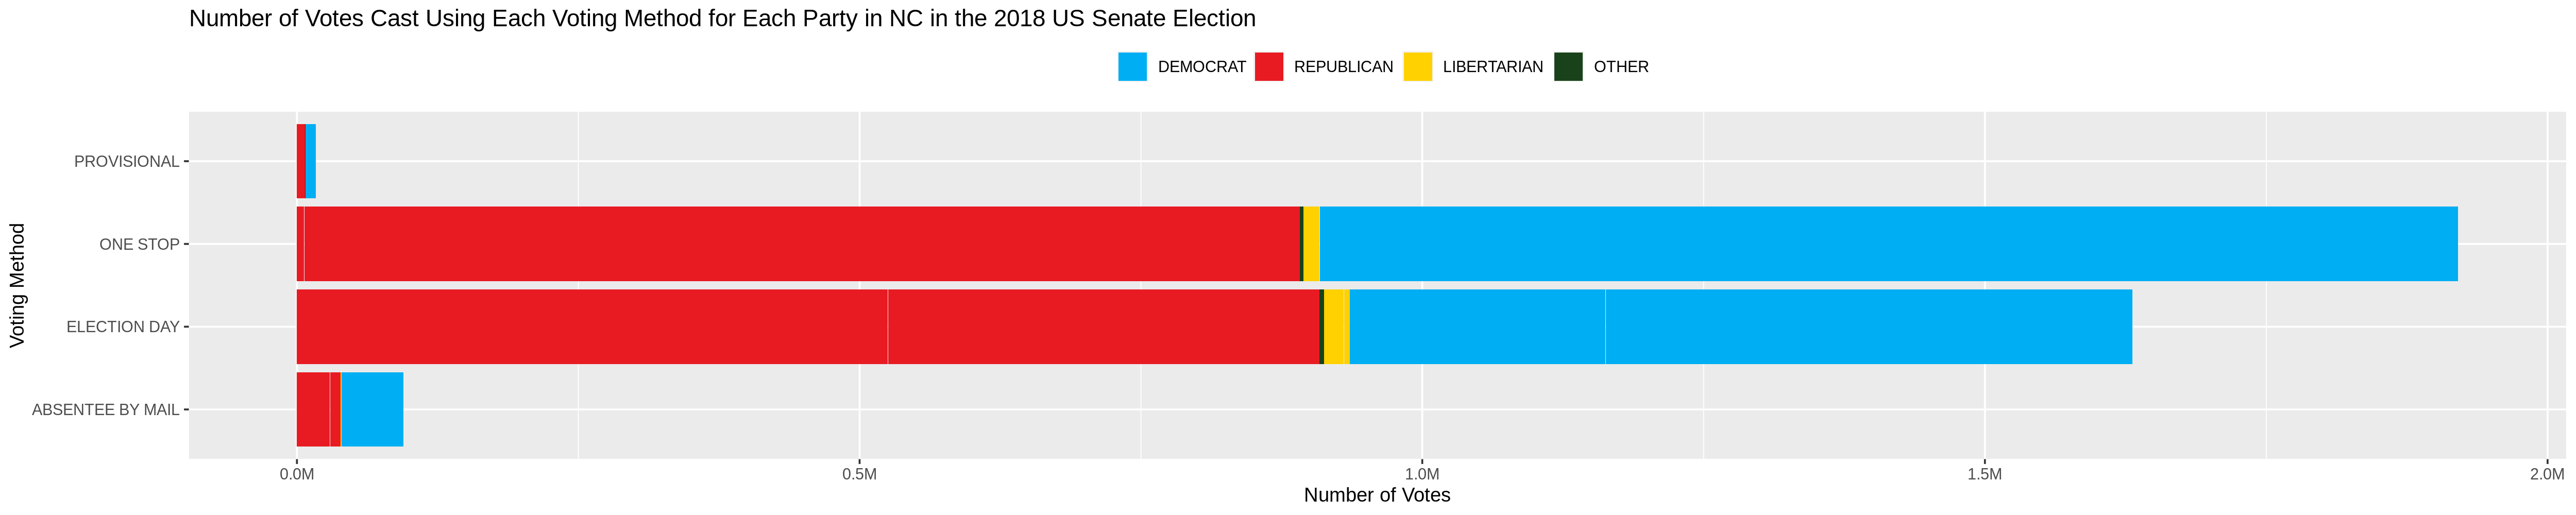

In [87]:
options(repr.plot.height = 4, repr.plot.width = 20, repr.plot.res = 250)
p = ggplot(us, aes(y = mode, x = votes / 1e6)) +
    geom_col(aes(fill = party_simplified)) +
    theme(legend.position = 'top', legend.title=element_blank()) +
    scale_fill_manual(breaks = c("DEMOCRAT", "REPUBLICAN", "LIBERTARIAN", "OTHER"), 
                      values=c("#00AEF3", "#E81B23", "#FFD100", "#19421A")) +
    scale_x_continuous(labels = scales::comma_format(big.mark = ',', suffix = "M")) +
    labs(x = 'Number of Votes', y = 'Voting Method') +
    ggtitle("Number of Votes Cast Using Each Voting Method for Each Party in NC in the 2018 US Senate Election")
p

Looking at the graph, it is more obvious that the proportion of Republican voters used One Stop and Election Day voting quite equally, while the Democratic voters used One Stop voting considerably more than Election Day voting.

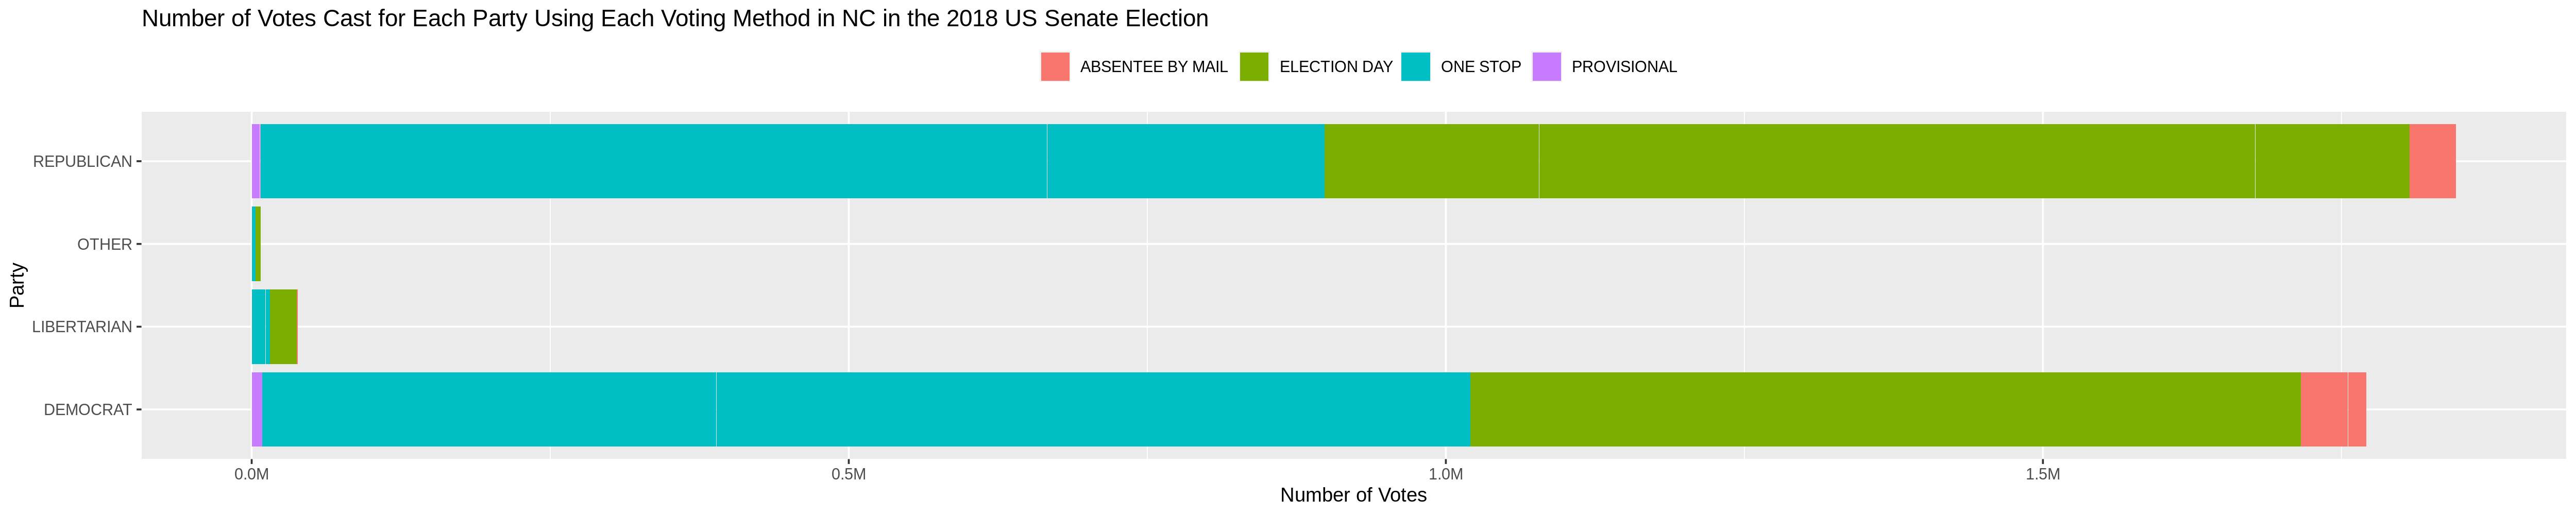

In [98]:
options(repr.plot.height = 4, repr.plot.width = 20, repr.plot.res = 250)
p = ggplot(us, aes(y = party_simplified, x = votes / 1e6)) +
    geom_col(aes(fill = mode)) +
    theme(legend.position = 'top', legend.title=element_blank()) +
    scale_x_continuous(labels = scales::comma_format(big.mark = ',', suffix = "M")) +
    labs(x = 'Number of Votes', y = 'Party') +
    ggtitle("Number of Votes Cast for Each Party Using Each Voting Method in NC in the 2018 US Senate Election")
p

I then flipped the grouping and graphing to compare how everything looked when comparing voting methods across parties. From here it is more obvious that less democratic votes were recieved, though more of the one stop voting votes were Democrat votes. This was flipped when looking at the ELection Day votes, where considerably more were Republican.